# QuAD - Data Analytics Cycle Revisited

**Author:** *[Catarina Moreira](http://cmoreira.eu)* - **Updated:** *23rd Mar 2020*

This Quick Analytics Demo (QuAD) provides you some guidance on how to formulate a business concern, get some data, analyse it, and extract some insights.

Please follow this notebook with the following videos:
    
- <a href="https://expl.ai/TXCWJUQ">1. Business Concern</a>
- <a href="https://youtu.be/CDoV03i-zQI">2. Collecting Data</a>
- <a href="https://youtu.be/oglcTT7oZf8">3. Load Data_Data Processing</a>
- <a href="https://youtu.be/O6xDgpkkqYs">4. Missing Values</a>
- <a href="https://youtu.be/HFne64M_oTs">5. Analysis</a>
- <a href="https://youtu.be/oyeTrXWfUZ0">6. Analysis and Insight</a>



In [ ]:
# import libraries

import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt 


# Load Data

In [2]:
filename = "ifn619_econ_data.csv"

# load the data contained in the file in to a pandas DataFrame
data = pd.read_csv( filename )
data

,Year,Quarter,GDP,CPI,ExchangeRate
0,2003,Q1,0.5,77.7,1.4937
1,2003,Q2,0.8,78.1,1.4256
2,2003,Q3,0.9,78.3,1.4300
3,2003,Q4,0.7,78.6,1.4334
4,2004,Q1,0.4,78.6,1.4708
...,...,...,...,...,...
63,2018,Q4,0.1,106.5,1.1275
64,2019,Q1,0.5,106.2,1.1472
65,2019,Q2,-0.3,107.3,1.1436
66,2019,Q3,0.4,107.7,1.1089


In [5]:
# extract general information
num_rows = data.shape[0]
num_cols = data.shape[1]

print("The dataset has %d rows and %d columns" %(num_rows, num_cols))

The dataset has 68 rows and 5 columns


In [8]:
# extract the variables of this dataset
vars = data.columns.tolist()
vars

['Year', 'Quarter', 'GDP', 'CPI', 'ExchangeRate']

In [9]:
# general information of data
data.describe()

,Year,GDP,CPI,ExchangeRate
count,68.000000,68.000000,68.000000,68.000000
mean,2011.000000,0.220588,92.844118,1.275268
std,4.935404,0.594140,9.359748,0.138280
min,2003.000000,-2.200000,77.700000,1.101000
25%,2007.000000,0.075000,84.025000,1.159450
50%,2011.000000,0.300000,93.950000,1.231100
75%,2015.000000,0.500000,100.125000,1.430850
max,2019.000000,1.300000,107.900000,1.499200


# Clean / Prepocess the Data

The advantage of government collected data:
- they are ususallly structured
- usually they do not contain many missing values
- information is trustworthy
- etc


In [10]:
# check if there are missing values:
data.info()
# there are no missing values to addresss in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
Year            68 non-null int64
Quarter         68 non-null object
GDP             68 non-null float64
CPI             68 non-null float64
ExchangeRate    68 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ KB


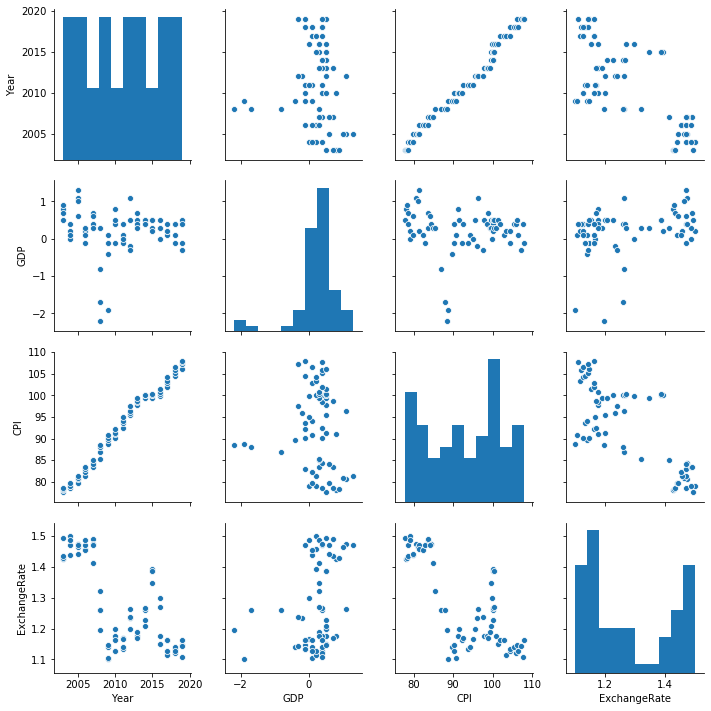

In [11]:
# How variables vary with each other
# this can provide some initial insights on how the variables are correlated with each other
g = sns.pairplot( dat )

 - there seems to be a positive correlation between the Consumer Price Index and the Year
 - However this does not provide us too much of an insight
 - It simply means that the CPI has been in a linear growth throughout the years



# Analysis

Remember the question: I am interested in knowing how BREXIT affected UK's economy, so let's try to see what happened to thexse variables around the year of 2016

In [20]:
# BREXIT: 23rd of June 2016

total_years = data.Year.unique().tolist()
total_years

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [22]:
# let's aggregate our data by year
# groupby function -> mean()

data_by_year = data.groupby("Year").mean()
data_by_year



,GDP,CPI,ExchangeRate
Year,,,
2003,0.725,78.175,1.445675
2004,0.175,79.125,1.474125
2005,1.000,80.675,1.462725
2006,0.125,82.500,1.466925
2007,0.500,84.250,1.462050
2008,-1.100,87.175,1.259250
2009,-0.575,89.875,1.123300
2010,0.400,91.275,1.166250
2011,0.100,93.850,1.152525


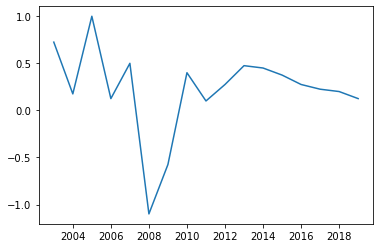

In [27]:
# it would be interesting to analyse UK's economy before and after the referendum
plt.plot(data_by_year.GDP)


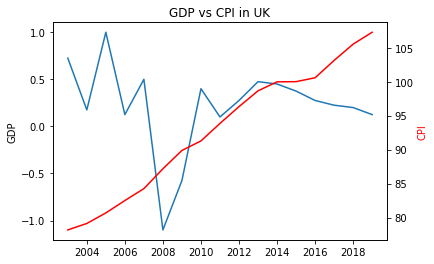

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data_by_year.GDP)
ax1.set_ylabel('GDP')

ax2 = ax1.twinx()
ax2.plot(data_by_year.CPI, 'r-')
ax2.set_ylabel('CPI', color='r')

plt.title('GDP vs CPI in UK')
plt.show()


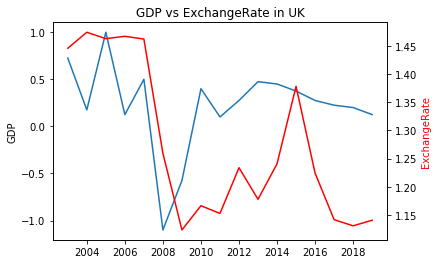

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data_by_year.GDP)
ax1.set_ylabel('GDP')

ax2 = ax1.twinx()
ax2.plot(data_by_year.ExchangeRate, 'r-')
ax2.set_ylabel('ExchangeRate', color='r')

plt.title('GDP vs ExchangeRate in UK')
plt.show()

In [48]:
# let's analyse before and after brexit

BREXIT_YEAR = 2016

# before brexit
before_br = data[ ( data['Year'] >= 2013 ) & ( data['Year'] <= BREXIT_YEAR ) ].groupby('Year').mean()

#  after brexit
after_br = data[ data['Year'] >= BREXIT_YEAR  ].groupby('Year').mean()
after_br


,GDP,CPI,ExchangeRate
Year,,,
2016,0.275,100.575,1.224025
2017,0.225,103.125,1.141525
2018,0.200,105.525,1.130575
2019,0.125,107.275,1.140525


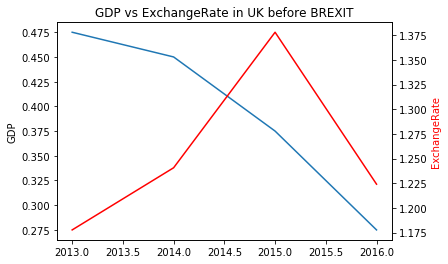

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(before_br.GDP)
ax1.set_ylabel('GDP')

ax2 = ax1.twinx()
ax2.plot(before_br.ExchangeRate, 'r-')
ax2.set_ylabel('ExchangeRate', color='r')

plt.title('GDP vs ExchangeRate in UK before BREXIT')
plt.show()

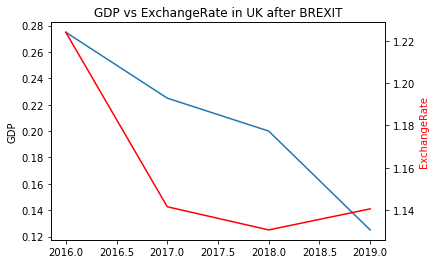

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(after_br.GDP)
ax1.set_ylabel('GDP')

ax2 = ax1.twinx()
ax2.plot(after_br.ExchangeRate, 'r-')
ax2.set_ylabel('ExchangeRate', color='r')

plt.title('GDP vs ExchangeRate in UK after BREXIT')
plt.show()

# INSIGHTS

- GDP in UK has been very unstable since the GFC of 2008.
- British pound was highly devaluated due to the GFC of 2008
- Right beofre 2016, the exchange rate of the british pound vs euros was approx 1.4. But after the UK referendum, this value dropped exponentially, in the end of 2019, the exchange rate was 1.14 euros. 
- There is a high correlation between the UK referendum and an exponential decrese of the british pound.
- This drop of the value of the currency is also highly correlated with the exponencial decrease of the GDP of the country.
- The CPI is linearly growing, so we could not take any inights out of it. not the best choice of variable and for that reason, we ignored it.

- Ultimatelly, Brexit did impact UK's economy, namely in terms of gross domestic product, high devaluation of the British pound

